# Reference

Collection of snippets defining all the elementary objects of shapes.py

## Table of Content

* [Line](#Line): defines a line providing start and end point
* [Rectangle](#Rectangle): defines a rectangle providing bottom left corner, x dimension, y dimension
* [Triangle](#Triangle): defines a triangle providing three corner
* [Circle](#Circle): defines a circle proving center and radius
* [Distance with text](#Distance-with-text): defines a sizing mark with a label 
* [Text](#Text): defines a given text positionned at the provided point
* [Cross](#Cross): defines a cross positionned at the provided point
* [Axis](#Axis): defines an axis at the given point with a given label
* [Arc](#Arc): defines an Arc providing a center point, a radius, a starting angle and an angle (rotates clock-wise)
* [Arc_wText](#Arc_wText): defines an arc with text positionned left (moving clock-wise) of arc half-way
* [Arrow1](#Arrow1): defines a line with arrow(s) given starting and ending point and arrow termination(s) ->, \<->, \<-
* [Force](#Force): defines an Indication of a force by an arrow and a text (symbol)
* [Wall](#Wall): defines an hached box given starting, ending point and thickness, filled with a pattern 
* [Curve](#Curve): defines a general curve as a sequence of (x,y) coordinates
* [Gravity](#Gravity): defines a downward-pointing gravity arrow with the symbol g or user given symbol.
* [Moment](#Moment): defines a Moment arrow with text given text, center and radius
* [Text_wArrow](#Text_wArrow): Text, but an arrow is drawn from the mid part of the text to some point `arrow_tip`
* [Wheel](#Wheel): Hub and spokes Wheel given center, radius, spokes (default 10), inner_radius(default 1/5 of radius)
* [Spring](#Spring): Specify a *vertical* spring, starting at `start` and with `length` as total vertical length
* [Dashpot](#Dashpot): Specify a vertical dashpot of height `total_length` and `start` as bottom/starting point.


## Setup

In [1]:
 %matplotlib widget

In [2]:
from pysketcher import *

In [3]:
drawing_tool.set_coordinate_system(xmin=-10, xmax=10,ymin=-10, ymax=10,axis=True)

In [4]:
from IPython.display import SVG, display

In [5]:
from math import tan, radians, sin, cos

In [6]:
import numpy as np

## Extra steps for YAML

In [7]:
head = """\
name: head
shapes:
    libraries: ["from math import tan, radians, sin, cos","from pysketcher import *", "import numpy as np"]
"""
myfig={}
sketchParse(head,myfig)

True

## Canvas

In [8]:
drawing_tool.mpl.gcf().canvas

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Line

[home](#Table-of-Content)

### YAML

In [ ]:
line = """\
name: line
shapes:
    A: point(-5,-5)
    B: point(5,5)
    line: Line(A,B)
"""
drawing_tool.erase()
sketchParse(line,myfig)
# replace 'object' by the actual one
d = myfig['line'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
A = point(-5,-5)
B = point(5,5)
line = Line(A,B)
line.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Rectangle

[home](#Table-of-Content)

### YAML

In [ ]:
rectangle="""
name: rectangle
shapes:
    L: 8
    h: 5
    p: point(-(L/2),-(h/2))
    rectangle: Rectangle(p,L,h)
"""
drawing_tool.erase()
sketchParse(rectangle,myfig)
d = myfig['rectangle'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
L = 8
h = 5
p = point(-(L/2),-(h/2))
rectangle = Rectangle(p,L,h)
rectangle.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Triangle

[home](#Table-of-Content)

### YAML

In [ ]:
triangle="""
name: triangle
shapes:
    L: 3.0
    W: 4.0
    triangle: Triangle(p1=(W/2,0), p2=(3*W/2,W/2), p3=(4*W/5.,L))
"""
drawing_tool.erase()
sketchParse(triangle,myfig)
d = myfig['triangle'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
L = 3.0
W = 4.0
triangle = Triangle(p1=(W/2,0), p2=(3*W/2,W/2), p3=(4*W/5.,L))
triangle.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Circle

[home](#Table-of-Content)

### YAML

In [ ]:
circle="""
name: circle
shapes:
    circle: Circle(point(0,0),5)
"""
drawing_tool.erase()
sketchParse(circle,myfig)
d = myfig['circle'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
circle = Circle(point(0,0),5)
circle.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Distance with text

[home](#Table-of-Content)

### YAML

In [ ]:
dwt="""
name: dwt
shapes:
    fontsize: 14
    t: r'$ 2\pi R^2 $'  # sample text
    dwt: Distance_wText((-4,0), (8, 5), t, fontsize)
"""
drawing_tool.erase()
sketchParse(dwt,myfig)
d = myfig['dwt'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
fontsize=14
t = r'$ 2\pi R^2 $'  # sample text
dwt = Distance_wText((-4,0), (8, 5), t, fontsize)
dwt.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Text

[home](#Table-of-Content)

### YAML

In [ ]:
text="""
name: text
shapes:
    text: Text(r'$c$', point(0,0))
"""
drawing_tool.erase()
sketchParse(text,myfig)
# replace 'object' by the actual one
d = myfig['text'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
text = Text(r'$c$', point(0,0))
text.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Cross

[home](#Table-of-Content)

### YAML

In [ ]:
cross="""
name: cross
shapes:
    c: point(0,0)
    l: 0.1
    line1: Line(c+point(-l,l),c+point(l,-l))
    line2: Line(c+point(l,l), c+point(-l,-l))
    cross: 
        formula: "Composition({'line1': line1, 'line2': line2})"
        style:
            linecolor: black
            linewidth: 1
"""
drawing_tool.erase()
sketchParse(cross,myfig)
d = myfig['cross'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

In [ ]:
cross1="""\
name: cross1
shapes:
    cross1: Cross(point(0,0))
"""
drawing_tool.erase()
sketchParse(cross1,myfig)
d = myfig['cross1'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
cross = Cross(point(1,0))
cross.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Axis

[home](#Table-of-Content)

### YAML

In [ ]:
axis="""
name: axis
shapes:
    axis: Axis((0,0), 5, 'x', rotation_angle=0)
"""
drawing_tool.erase()
sketchParse(axis,myfig)
d = myfig['axis'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
axis = Axis((0,0), 5, 'x', rotation_angle=0)
axis.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Arc

[home](#Table-of-Content)

### YAML

In [ ]:
arc="""
name: arc
shapes:
    center: point(0,0)
    radius: 1
    angle: 120
    start_angle: 180-angle
    arc_angle: angle
    arc: Arc(center, radius, start_angle, arc_angle)
"""
sketchParse(arc,myfig)
drawing_tool.erase()
d = myfig['arc'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
center = point(0,0)
radius = 1
angle = 120
start_angle = 180-angle
arc_angle = angle
arc = Arc(center, radius, start_angle, arc_angle)
arc.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Arc_wText

[home](#Table-of-Content)

### YAML

In [ ]:
arc_wtxt="""
name: arc_wtxt
shapes:
    center: point(0,0)
    radius: 1
    angle: 120
    start_angle: 90-angle
    arc_angle: angle
    arc_wtxt: "Arc_wText(r'$<bslash>theta$', center, radius, start_angle, arc_angle)"
"""
drawing_tool.erase()
sketchParse(arc_wtxt,myfig)
d = myfig['arc_wtxt'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
center = point(0,0)
radius = 1
angle = 120
start_angle = 180-angle
arc_angle = angle
arc_wtxt = Arc_wText(r'$\theta$', center, radius, start_angle, arc_angle)
arc_wtxt.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Arrow1

[home](#Table-of-Content)

### YAML

In [ ]:
arrow1="""
name: arrow1
shapes:
    start: point(0,0)
    end: point(5,5)
    arrow1: Arrow1(start, end, style='<->')
"""
drawing_tool.erase()
sketchParse(arrow1,myfig)
d = myfig['arrow1'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
start = point(0,0)
end = point(5,5)
arrow1 = Arrow1(start, end, style='<->')
arrow1.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Force

[home](#Table-of-Content)

### YAML

In [ ]:
force="""
name: force
shapes:
    x: 0
    y: 0
    contact: point(x, y)
    vector: point(-3,-5)
    force: Force(contact - vector, contact, r'$Force$', text_pos='start')
"""
drawing_tool.erase()
sketchParse(force,myfig)
d = myfig['force'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
x = 0
y = 0
contact = point(x, y)
vector = point(-3,-5)
force = Force(contact - vector, contact, r'$Force$', text_pos='start')
force.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Wall

[home](#Table-of-Content)

### YAML

In [ ]:
wall="""
name: wall
shapes:
    theta: 30
    L: 8
    B: point(L-4,-2)                      # wall right end
    A: point(-4,tan(radians(theta))*L-2)  # wall left end
    wall: 
        formula: Wall(x=[A[0], B[0]], y=[A[1], B[1]], thickness=-0.5,transparent=False)
        style:
            linecolor: black
"""
drawing_tool.erase()
sketchParse(wall,myfig)
d = myfig['wall'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
theta = 30
L = 8
B = point(L-4,-2)                      # wall right end
A = point(-4,tan(radians(theta))*L-2)  # wall left end
wall= Wall(x=[A[0], B[0]], y=[A[1], B[1]], thickness=-0.5,transparent=False)
wall.set_linecolor('black')
wall.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Curve

[home](#Table-of-Content)

### YAML

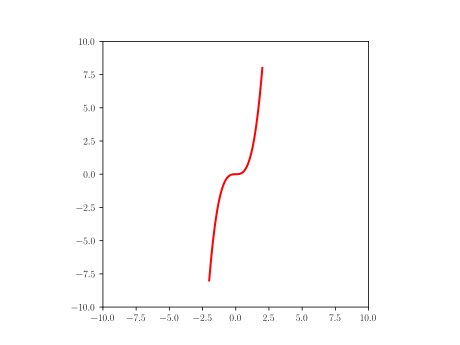

In [8]:
curve="""\
name: curve
shapes:
    N: 100
    x: np.linspace(-2.0, 2.0, N)
    y: x**3
    curve: Curve(x,y)
"""
drawing_tool.erase()
sketchParse(curve,myfig)
d = myfig['curve'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

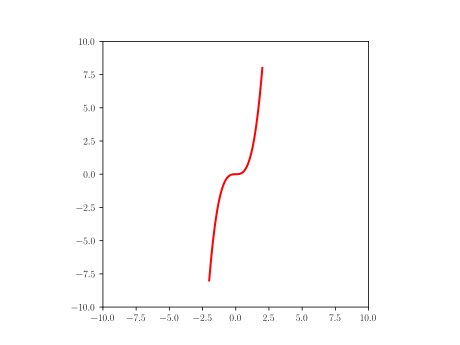

In [11]:
drawing_tool.erase()
N = 100
x = np.linspace(-2.0, 2.0, N)
y = x**3
curve = Curve(x,y)
curve.draw()
curve.set_name("curve")
drawing_tool.display()
display(SVG(sketch2SVG()))

## Gravity

[home](#Table-of-Content)

### YAML

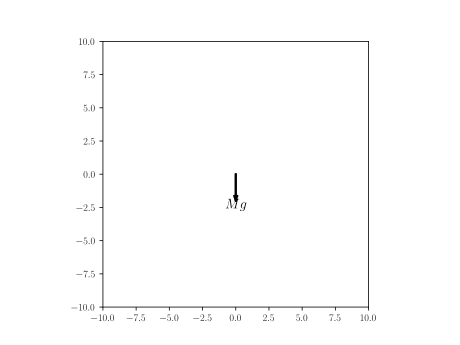

In [16]:
gravity="""
name: gravity
shapes:
    c: point(0,0)
    r: 2
    gravity: 
        formula: Gravity(c, r, text='$Mg$')
"""
drawing_tool.erase()
sketchParse(gravity,myfig)
d = myfig['gravity'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

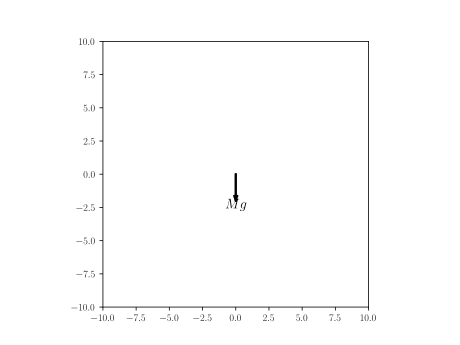

In [14]:
drawing_tool.erase()
c = point(0,0)
r = 2
gravity = Gravity(c, r, text='$Mg$')
gravity.set_name("gravity")
gravity.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Moment

[home](#Table-of-Content)

### YAML

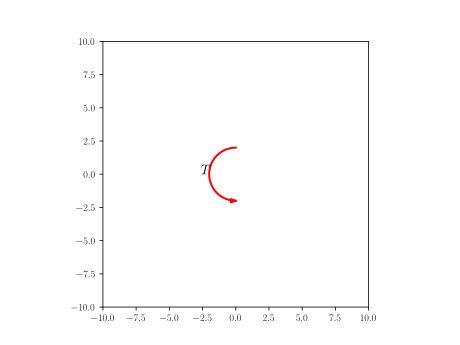

In [18]:
moment="""
name: moment
shapes:
    moment: Moment("$T$", point(0,0), 2)
"""
drawing_tool.erase()
sketchParse(moment,myfig)
d = myfig['moment'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

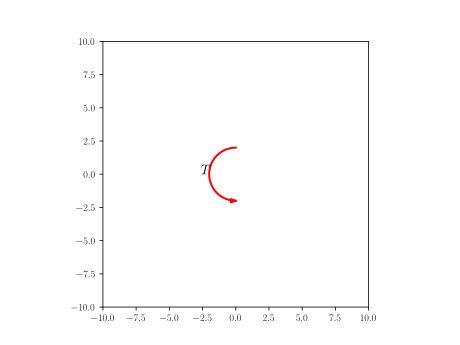

In [19]:
drawing_tool.erase()
moment = Moment("$T$", point(0,0), 2)
moment.shape_name="moment"
moment.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Text_wArrow

[home](#Table-of-Content)

### YAML

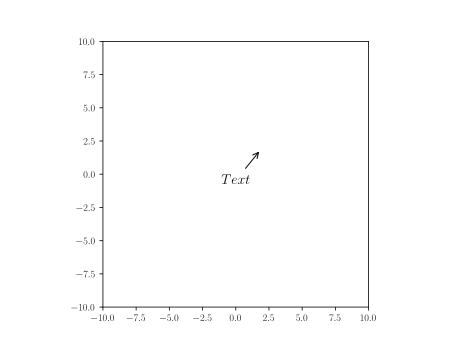

In [26]:
txtarrow="""
name: txtarrow
shapes:
    txtarrow: Text_wArrow("$Text$", point(0,0), point(2,2))
"""
drawing_tool.erase()
sketchParse(txtarrow,myfig)
d = myfig['txtarrow'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

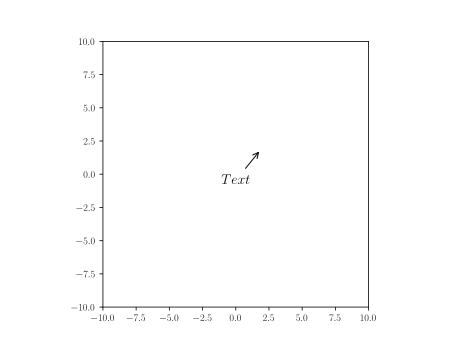

In [27]:
drawing_tool.erase()
txtarrow = Text_wArrow("$Text$", point(0,0), point(2,2))
txtarrow.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Wheel

[home](#Table-of-Content)

### YAML

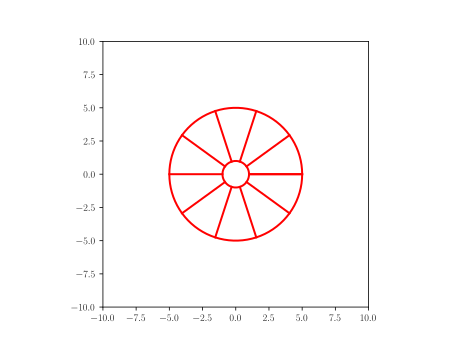

In [9]:
wheel="""
name: wheel
shapes:
    wheel: Wheel(point(0,0), 5)
"""
drawing_tool.erase()
sketchParse(wheel,myfig)
d = myfig['wheel'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

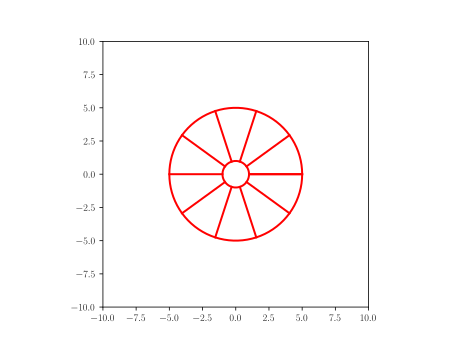

In [10]:
drawing_tool.erase()
wheel = Wheel(point(0,0), 5)
wheel.set_name("wheel")
wheel.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Spring

[home](#Table-of-Content)

### YAML

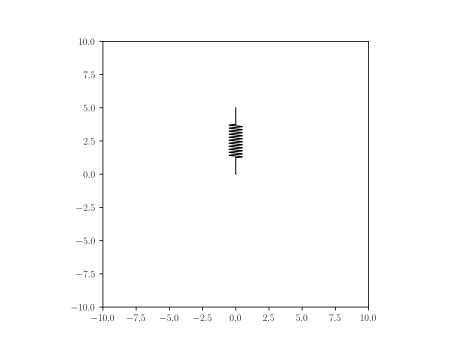

In [12]:
spring="""
name: spring
shapes: 
    spring: 
       formula: Spring(point(0,0),5)
       style:
           linecolor: black
           linewidth: 1
"""
drawing_tool.erase()
sketchParse(spring,myfig)
d = myfig['spring'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

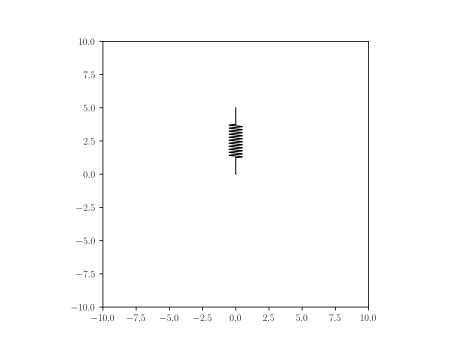

In [13]:
drawing_tool.erase()
spring = Spring(point(0,0),5)
spring.set_linecolor('black')
spring.set_linewidth(1)
spring.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Dashpot

[home](#Table-of-Content)

### YAML

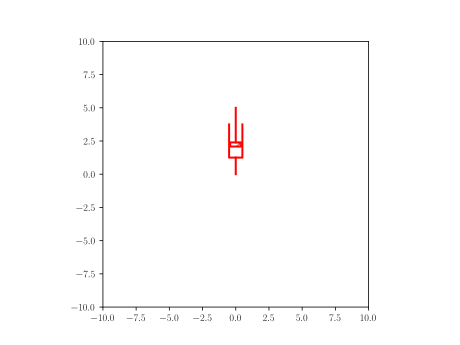

In [17]:
dashpot="""
name: dashpot
shapes:
    dashpot: Dashpot(point(0,0),5)
"""
drawing_tool.erase()
sketchParse(dashpot,myfig)
d = myfig['dashpot'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

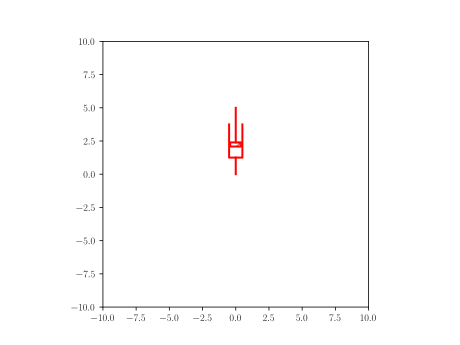

In [18]:
drawing_tool.erase()
dashpot = Dashpot(point(0,0),5)
dashpot.set_name("dashpot")
dashpot.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Point

[home](#Table-of-Content)

### YAML

In [19]:
point1="""
name: point1
shapes:
    point1: Point(0,0)
"""
drawing_tool.erase()
sketchParse(point1,myfig)
d = myfig['point1'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

NotImplementedError: class Point must implement the draw method

### Python

In [ ]:
drawing_tool.erase()
# put code
object = ...
object.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))

## Object

[home](#Table-of-Content)

### YAML

In [ ]:
object="""
TBC:
"""
drawing_tool.erase()
sketchParse(object,myfig)
# replace 'object' by the actual one
d = myfig['object'].draw() 
drawing_tool.display()
display(SVG(sketch2SVG()))

### Python

In [ ]:
drawing_tool.erase()
# put code
object = ...
object.draw()
drawing_tool.display()
display(SVG(sketch2SVG()))